推荐使用ipython的pylab模式，如果要在ipython notebook中嵌入图片，则还需要指定pylab=inline。

In [54]:
ipython --pylab ##ipython的pylab模式
ipython notebook --pylab=inline ##notebook的inline模式
import pandas as pd

## 基本画图命令

Pandas通过整合[matplotlib](http://matplotlib.sourceforge.net/)的相关功能实现了基于DataFrame的一些作图功能。下面的数据是每年美国男女出生数据：

In [133]:
url_1 = 'http://s3.amazonaws.com/assets.datacamp.com/course/dasi/present.txt'
present = pd.read_table(url, sep=' ')

In [7]:
present.shape

(63, 3)

In [8]:
present.columns

Index([u'year', u'boys', u'girls'], dtype='object')

可以看到这个数据集共有63条记录，共有三个字段：Year，boys，girls。为了简化计算将year作为索引。

In [20]:
present_year = present.set_index('year')

plot是画图的最主要方法，Series和DataFrame都有plot方法。

我们可以这样看一下男生出生比例的趋势图：

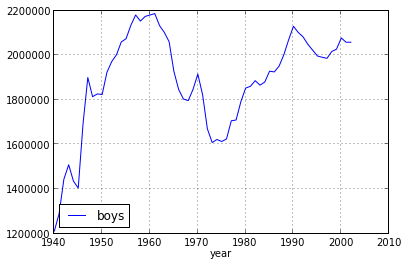

In [92]:
present_year['boys'].plot()
plt.legend(loc='best')

这是Series上的plot方法，通过DataFrame的plot方法，你可以将男生和女生出生数量的趋势图画在一起。

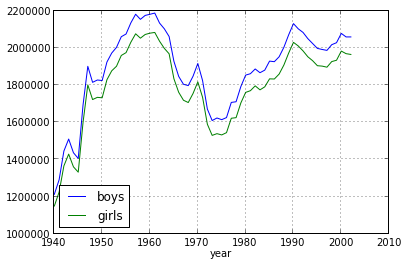

In [36]:
present_year.plot()

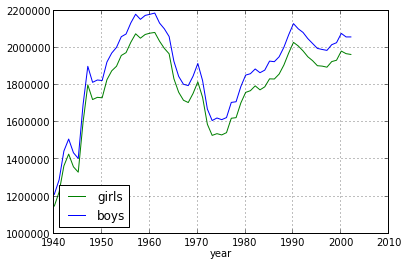

In [53]:
present_year.girls.plot(color='g')
present_year.boys.plot(color='b')
plt.legend(loc='best')

可以看到DataFrame提供plot方法与在多个Series调用多次plot方法的效果是一致。

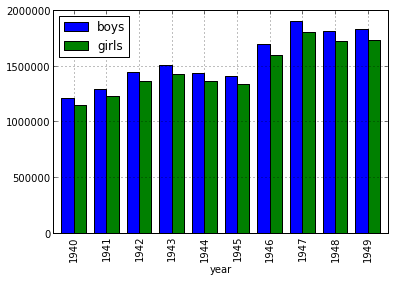

In [71]:
present_year[:10].plot(kind='bar')

plot默认生成是曲线图，你可以通过kind参数生成其他的图形，可选的值为：line, bar, barh, kde, density, scatter。

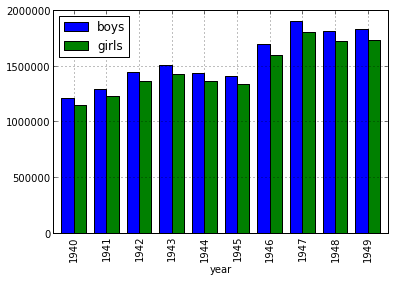

In [83]:
present_year[:10].plot(kind='bar')

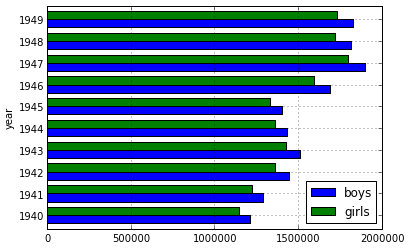

In [84]:
present_year[:10].plot(kind='barh')

如果你需要累积的柱状图，则只需要指定stacked=True。

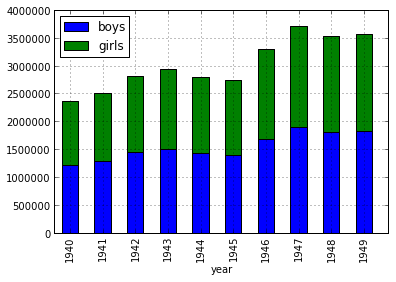

In [85]:
present_year[:10].plot(kind='bar', stacked=True)

制作相对的累积柱状图，需要一点小技巧。

首先需要计算每一行的汇总值，可以在DataFrame上直接调用sum方法，参数为1，表示计算行的汇总。默认为0，表示计算列的汇总。

In [119]:
present_year.sum(1)[:5]

year
1940    2360399
1941    2513427
1942    2808996
1943    2936860
1944    2794800
dtype: int64

有了每一行的汇总值之后，再用每个元素除以对应行的汇总值就可以得出需要的数据。这里可以使用DataFrame的div函数，同样要指定axis的值为0。

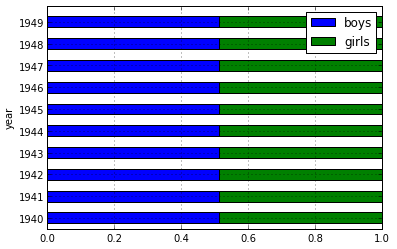

In [124]:
present_year.div(present_year.sum(1),axis=0)[:10].plot(kind='barh', stacked=True)

# 散点图和相关
plot也可以画出散点图。使用kind='scatter', x和y指定x轴和y轴使用的字段。

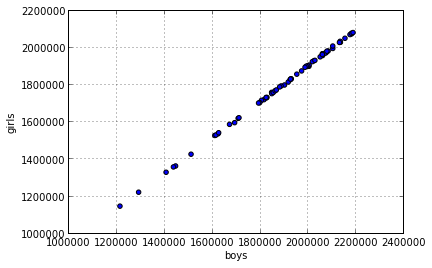

In [138]:
present_year.plot(x='boys', y='girls', kind='scatter')

我们再来载入一下鸢尾花数据。

In [137]:
url_2 = 'https://raw.github.com/pydata/pandas/master/pandas/tests/data/iris.csv'
iris = pd.read_csv(url_2)
iris.head(5)

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

[5 rows x 5 columns]

In [141]:
iris.corr()

SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000

[4 rows x 4 columns]

array([[<matplotlib.axes.AxesSubplot object at 0x1141e5290>,
        <matplotlib.axes.AxesSubplot object at 0x114d4a2d0>]], dtype=object)

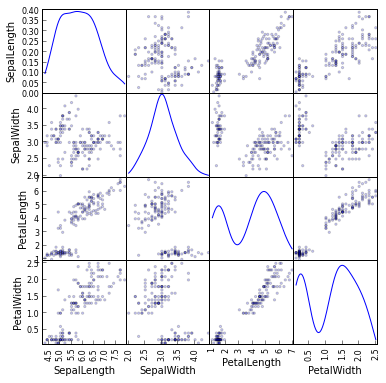

In [143]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, alpha=0.2, figsize=(6, 6), diagonal='kde')

# 箱图
DataFrame提供了boxplot方法可以用来画箱图。

{'boxes': [<matplotlib.lines.Line2D at 0x1141439d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11416af90>,
 'fliers': [<matplotlib.lines.Line2D at 0x114145410>,
 'medians': [<matplotlib.lines.Line2D at 0x114143ed0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11416a7d0>,
  <matplotlib.lines.Line2D at 0x11414f2d0>]}

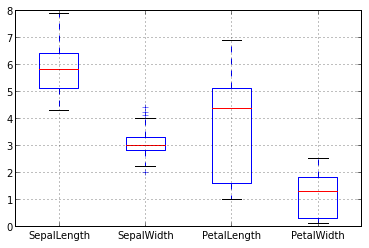

In [139]:
iris.boxplot()

通过by参数可以计算不同分组情况下，各个字段的箱图。

array([[<matplotlib.axes.AxesSubplot object at 0x120dd8f50>,
        <matplotlib.axes.AxesSubplot object at 0x1218de490>]], dtype=object)

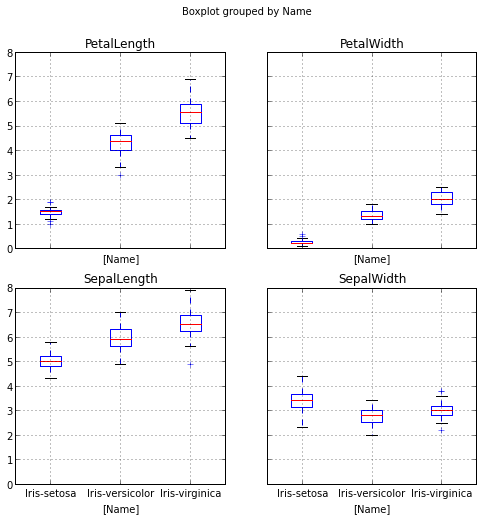

In [171]:
iris.boxplot(by='Name', figsize=(8, 8))

# 直方图和概率密度分布

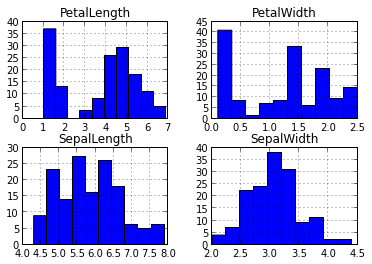

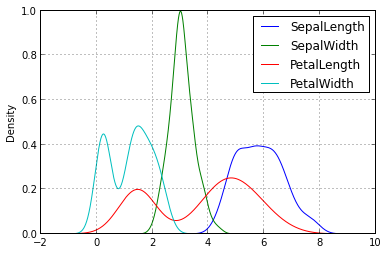

In [150]:
iris.ix[:,:-1].hist()
iris.plot(kind='kde')

# 多变量的可视化

Radviz

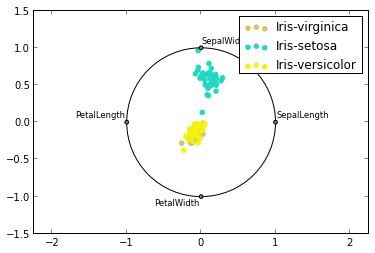

In [146]:
from pandas.tools.plotting import radviz
radviz(iris, 'Name')

Andrews Curves

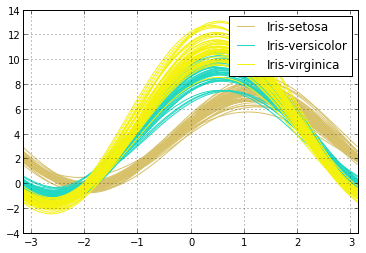

In [173]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'Name')

Parallel Coordinates

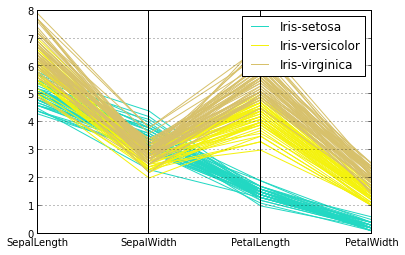

In [174]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, 'Name')